## Infos
### Members (63.867.246 linhas)
| Campo | Tipo | Observações | Analisado |
|-------|------|-------------|-----------|
| msno | String | Sem valores nulos | ✅ |
| safra | Datetime (YYYYMM) | Sem valores nulos, vai até 201612 | ✅ |
| registration_init_time | Datetime | Sem valores nulos | ✅ |
| city | Int (categoria) | Sem valores nulos | ✅ |
| bd | Int | Sem valores nulos | ✅ |
| gender | String / Nulo (categoria) | Possui valores nulos | ✅ |
| registered_via | Int (categoria) | Sem valores nulos | ✅ |
| is_ativo | Boolean | Sem valores nulos, grande maioria inativa | ✅ |
| registration_init_time_year | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_month | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_day | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_day_of_week | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_day_of_year | Int | (Gerado) Derivado de registration_init_time | ✅ |

<br>

**TODO**<br>
- Renomear "is_ativo" para "is_active" para manter o padrão de nomenclatura ✅
- Separar campos Datetime em ano, mês e dia ✅
    - registration_init_time ✅
- Tratar campo "gender" marcado como nulo ✅
    - Removendo campo: cerca de 59% dos registros são inválidos ✅
- Remover outliers de `bd` + tratar valores 0 (grande maioria) ✅
    - Removendo campo ✅

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Utils.DataLoader import DataLoader
from Utils.DataAnalysis import DataAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from Utils import PandasNotebookConfigs

In [3]:
DATA_LOADER = DataLoader()
DATA_ANALYSIS = DataAnalysis()

PandasNotebookConfigs.config()

Ajustando display.float.format para %.2f


# Members

In [4]:
members_df = DATA_LOADER.load_members_df(
    nrows=1000
)

In [6]:
print(f'Rows qty: {len(members_df)}')

Rows qty: 1000


In [5]:
members_df.dtypes

msno                                          object
safra                                         object
registration_init_time                datetime64[ns]
city                                        category
bd                                             int64
gender                                      category
registered_via                              category
is_active                                       bool
registration_init_time_year                    int32
registration_init_time_month                   int32
registration_init_time_day                     int32
registration_init_time_day_of_week             int32
registration_init_time_day_of_year             int32
dtype: object

In [6]:
members_df.head()

,msno,safra,registration_init_time,city,bd,gender,registered_via,is_ativo
0,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201612,2014-09-27,1,0,NaN,7,True
1,++/AwGzubug3gT6J+0STBGMdWKxaM+UFZTI8Tcmq4To=,201607,2015-03-22,1,0,NaN,9,False
2,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,201601,2012-12-17,15,32,male,3,True
3,++02XbtviomSxcIBUHMOiJkjRxdicTXSfiVqLdsr5lo=,201603,2013-11-12,14,21,male,7,False
4,++0O0Bq04sB/9ZcOS+pajpYL2Hin9jCqnc/8bKzKFuE=,201610,2014-10-21,5,33,male,3,False


In [12]:
members_df.isna().sum()

msno                             0
safra                            0
registration_init_time           0
city                             0
bd                               0
gender                    38210177
registered_via                   0
is_ativo                         0
dtype: int64

In [7]:
members_df.describe()

,registration_init_time,bd
count,63867246,6.386725e+07
mean,2014-06-10 23:17:42.231807232,1.143016e+01
min,2004-03-26 00:00:00,-7.168000e+03
25%,2013-10-20 00:00:00,0.000000e+00
50%,2015-03-15 00:00:00,0.000000e+00
75%,2015-12-25 00:00:00,2.400000e+01
max,2016-12-31 00:00:00,2.016000e+03
std,NaN,1.904132e+01


In [8]:
# Less values than the total rows
len(members_df.msno.unique())

6287789

<Axes: xlabel='registration_init_time'>

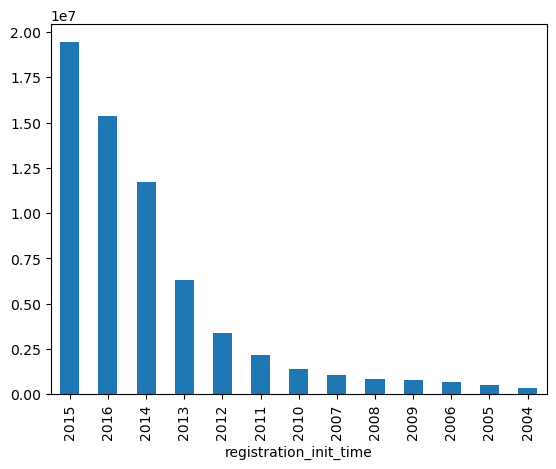

In [10]:
members_df.registration_init_time.dt.year.value_counts().plot.bar()

<Axes: xlabel='registration_init_time'>

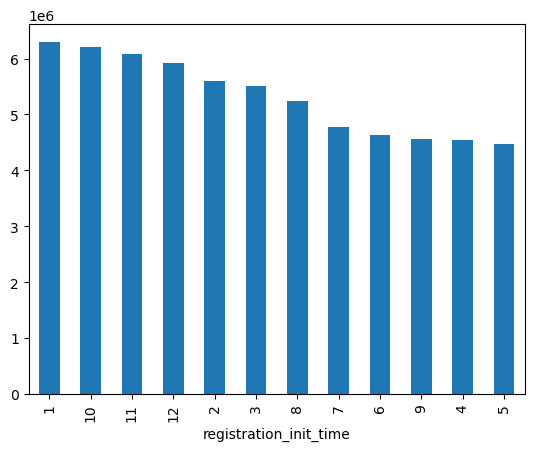

In [11]:
members_df.registration_init_time.dt.month.value_counts().plot.bar()

<Axes: xlabel='city'>

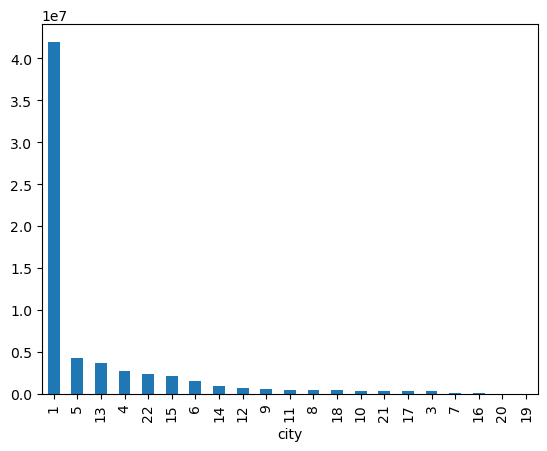

In [15]:
members_df.city.value_counts().plot.bar()

In [19]:
members_df.bd.value_counts()

bd
 0       39509864
 22       1220332
 21       1196188
 20       1183935
 27       1136339
           ...   
-497            2
-507            1
 1421           1
-501            1
-527            1
Name: count, Length: 385, dtype: int64

In [23]:
members_df.gender.value_counts()

gender
male      13075425
female    12581644
Name: count, dtype: int64

In [24]:
members_df.gender.isna().sum()

np.int64(38210177)

In [25]:
members_df.registered_via.value_counts()

registered_via
4     19648219
3     18640987
9     16776651
7      8407395
11      269614
8        47588
5        18715
2        16847
16       10564
13        7546
14        7111
17        6630
19        5629
6         3380
1          254
10         104
-1          12
Name: count, dtype: int64

In [26]:
members_df.is_ativo.value_counts()

is_ativo
False    52624381
True     11242865
Name: count, dtype: int64

<Axes: xlabel='is_ativo'>

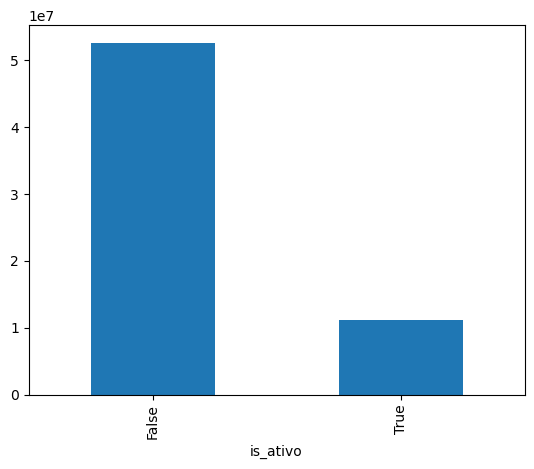

In [27]:
members_df.is_ativo.value_counts().plot.bar()

In [28]:
members_df.safra.describe()

count     63867246
unique          12
top         201612
freq       6287789
Name: safra, dtype: object